<small><i>This notebook was put together by [Volha Hedranovich](http://www.rocketscience.ai) and [Alexander Fridman](http://www.rocketscience.ai) for the Lecture Course. Source and license info is on [GitHub](https://github.com/volhahedranovich/jupyter_lectures).</i></small>

# Clustering: hierarchical agglomerative (bottom-up)

Let's explore **Hierarchical clustering (scipy.cluster.hierarchy)** with different linkage methods. We'll apply this scipy package as it provides dendrogram plotting.

First do initial imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import cluster

from user_methods.clustering_widgets import plot_dendrogram_interactive


%matplotlib inline

We'll use **mtcars** dataset to perform clustering. Let's import the data and take a look at it.

In [2]:
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url, index_col='model')
del df.index.name
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Hierarchical Agglomerative Clustering

It is bottom-up hierarchical algorithm which treats each document as a singleton cluster at the outset and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster that contains all documents. Bottom-up hierarchical clustering is therefore called hierarchical agglomerative clustering or HAC.

HAC is typically visualized as a dendrogram. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where documents are viewed as singleton clusters. We call this similarity the combination similarity of the merged cluster. We define the combination similarity of a singleton cluster as its document's self-similarity.

By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history (ontology) of merges that resulted in the depicted clustering.

HAC does not require a prespecified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering. In those cases, the hierarchy needs to be cut at some point. A number of criteria can be used to determine the cutting point:

- Cut at a prespecified level of similarity. For example, we cut the dendrogram at 0.4 if we want clusters with a minimum combination similarity of 0.4.

- Cut the dendrogram where the gap between two successive combination similarities is largest. Such large gaps arguably indicate "natural" clusterings. Adding one more cluster decreases the quality of the clustering significantly, so cutting before this steep decrease occurs is desirable. This strategy is analogous to looking for the "knee" in the K-means "Scree plot".

- Apply Equation:
    $$
K=\begin{matrix}
  argmin \\
  K'
 \end{matrix}\Big[RSS(K')+\lambda K' \Big]
 $$

    where $K'$ refers to the cut of the hierarchy that results in $K$ clusters, $RSS$ is the residual sum of squares and $\lambda$ is a penalty for each additional cluster. Instead of $RSS$, another measure of distortion can be used.


- As in flat clustering, we can also prespecify the number of clusters $K$ and select the cutting point that produces $K$ clusters.

[Source](https://nlp.stanford.edu/IR-book/html/htmledition/hierarchical-agglomerative-clustering-1.html)

## scipy.cluster.hierarchy.linkage

It performs hierarchical agglomerative clustering on the condensed distance matrix. 

The following are methods for calculating the distance between the newly formed cluster and each previously existed cluster:
- 'single'
- 'complete'
- 'average'
- 'centroid'
- 'weighted'
- 'meadin'
- 'ward'

[More info](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)

Let's calculate the distances between each sample. You can try to use different linkage methods and compare the results.

In [3]:
linkage_method = 'single'
Z = cluster.hierarchy.linkage(df, method=linkage_method, optimal_ordering=True)

Now we can build a dendrogram. Parameter **color_threshold** sets the cut off level for cluster nodes.

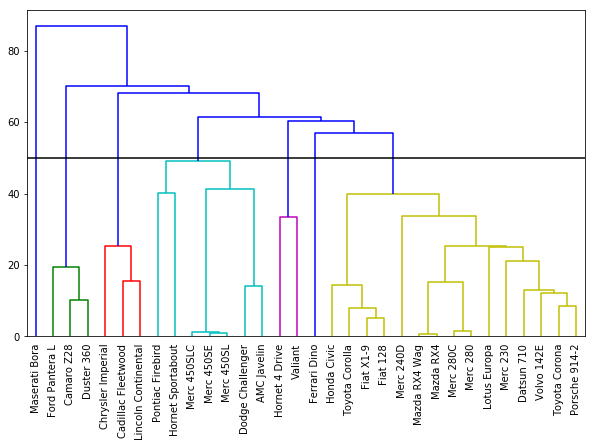

In [4]:
color_thresh = 50

plt.figure(figsize=(10, 6))
cluster.hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=10, labels=df.index,
                             distance_sort=True, color_threshold=color_thresh)
plt.axhline(y=color_thresh, c='k')

## Interactive dendrogram builder

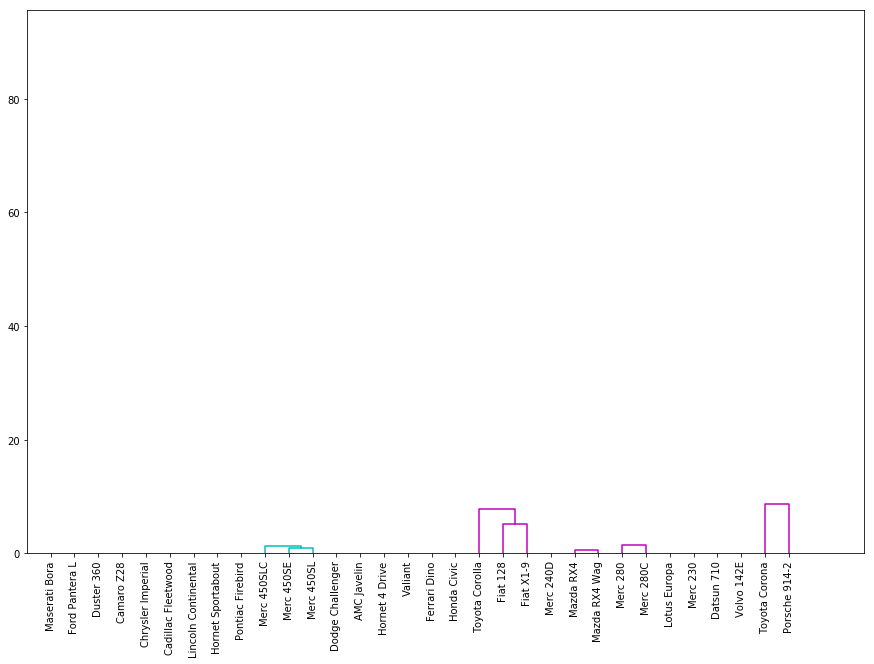

In [5]:
plot_dendrogram_interactive(linkage_method='single') # color_thresh = 50